PAIR PROGRAMMING GROUP-37

NAME: SHRINIVAS BHUSANNAVAR            SJSU ID : 016990545
   NAME: KARTHIK NIMMAGADDA                SJSU ID : 016996148



# Part 1: 

### Heart Dataset Analysis In this section, we explore and analyze the "heart-train.csv" and "heart- test.csv" datasets. Our goal is to gain insights into the dataset, understand its structure, and prepare the data for further analysis. We will answer questions and perform data transformations using Python.



In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd            # For loading and processing data
import numpy as np             # For linear algebra operations
import seaborn as sns          # For data visualization
import matplotlib.pyplot as plt  # For data visualization
import plotly                  # For interactive plotting
from scipy import stats        # For statistical operations
from scipy.stats import shapiro  # For the Shapiro-Wilk test
from scipy.stats import f_oneway  # For one-way ANOVA test
from sklearn.preprocessing import StandardScaler  # For data preprocessing

# Ignore warnings to improve code readability
import warnings
warnings.filterwarnings('ignore')

# Initialize Plotly for offline plotting
from plotly.offline import plot, iplot, init_notebook_mode

# Import specific components for Plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as gobj
import plotly.figure_factory as ff

# Import the necessary module for statistical analysis
from statsmodels.formula.api import ols


##  Load the dataset and perform initial data exploration.

In [2]:

# Read a CSV file named 'heart_train.csv' and store its contents in a DataFrame called 'h_df'
h_df = pd.read_csv('heart_train.csv')


## Load the dataset and perform initial data exploration.


In [3]:
df_shape = h_df.shape
print("The shape of the DataFrame is:", df_shape)


The shape of the DataFrame is: (412, 10)


In [4]:
# Determine the dataset dimensions
num_rows = h_df.shape[0]  # Number of houses
num_columns = h_df.shape[1]  # Number of features

# Report on the dataset dimensions
print(f"The dataset comprises {num_rows} patient records and {num_columns} features.")
print(f"Among the {num_columns} features, one of them is the 'chd'. This means we have {num_columns - 1} different features that could potentially influence a patient's death or alive prediction. Let's explore these features further.")


The dataset comprises 412 patient records and 10 features.
Among the 10 features, one of them is the 'chd'. This means we have 9 different features that could potentially influence a patient's death or alive prediction. Let's explore these features further.


## FOUND DUPLICATE RECORDS , REMOVING DUPLICATE RECORDS

In [5]:
# Count the number of duplicated rows in the DataFrame
duplicated_count = h_df.duplicated().sum()

# Print the result
print("Number of Duplicated Rows:", duplicated_count)

Number of Duplicated Rows: 75


In [6]:
# Drop duplicated rows from the DataFrame
h_df = h_df.drop_duplicates()

# Optionally, you can reset the index if needed
h_df = h_df.reset_index(drop=True)


In [7]:
# Calculate the number of unique values in each column
unique_counts = h_df.nunique()

# Display the count of unique values in a transposed format
print("Count of Unique Values in Each Column (Transposed):")
print(unique_counts)

Count of Unique Values in Each Column (Transposed):
sbp           58
tobacco      165
ldl          261
adiposity    303
famhist        2
typea         48
obesity      296
alcohol      196
age           49
chd            2
dtype: int64


## updated records

In [8]:
# Determine the dataset dimensions
num_rows = h_df.shape[0]  # Number of houses
num_columns = h_df.shape[1]  # Number of features

# Report on the dataset dimensions
print(f"The dataset comprises {num_rows} patient records and {num_columns} features.")
print(f"Among the {num_columns} features, one of them is the 'chd'. This means we have {num_columns - 1} different features that could potentially influence a patient's death or alive prediction. Let's explore these features further.")


The dataset comprises 337 patient records and 10 features.
Among the 10 features, one of them is the 'chd'. This means we have 9 different features that could potentially influence a patient's death or alive prediction. Let's explore these features further.


In [9]:
h_df.head(3)

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1
1  132     6.20  6.47      36.21  Present     62    30.77    14.14   45    0
2  142     4.05  3.38      16.20   Absent     59    20.81     2.62   38    0

In [10]:
h_df.tail(3)

sbp  tobacco   ldl  adiposity famhist  typea  obesity  alcohol  age  chd
334  114     0.00  2.63       9.69  Absent     45    17.89     0.00   16    0
335  118     0.12  3.26      12.26  Absent     55    22.65     0.00   16    0
336  106     1.08  4.37      26.08  Absent     67    24.07    17.74   28    1

## Identify the types of variables present and categorize them.

### Category columns
nominal_columns = ['famhist']  
### Numerical columns
continuous_columns = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']  
binary_columns = ['chd']  

# Obtain insights about the data.

## Find the number of missing values for each column.

In [11]:
# Calculate the count of null values in each column
null_counts = h_df.isnull().sum()

# Create a DataFrame to store column names and their corresponding null counts
null_counts_df = pd.DataFrame({'Columns': null_counts.index, 'Null Count': null_counts.values})

# Create a dictionary to store data type, non-null counts, and null counts
info_data = {
    'Data Type': h_df.dtypes.tolist(),
    'Non-Null counts': h_df.count().tolist(),
    'Null counts': h_df.isnull().sum()
}

# Create a DataFrame to store the information
info_df = pd.DataFrame(info_data)

# Print data types, null and non-null counts info in a transposed format
print("Data Types, Null, and Non-null Counts Info:")
info_df.T

Data Types, Null, and Non-null Counts Info:


sbp  tobacco      ldl adiposity famhist  typea  obesity  \
Data Type        int64  float64  float64   float64  object  int64  float64   
Non-Null counts    337      337      337       337     337    337      337   
Null counts          0        0        0         0       0      0        0   

                 alcohol    age    chd  
Data Type        float64  int64  int64  
Non-Null counts      337    337    337  
Null counts            0      0      0

## Calculate summary statistics for numerical columns, such as mean, median, standard deviation, etc.

In [12]:
# Generate summary statistics for the numeric columns in the DataFrame
summary_statistics = h_df.describe()

# Display the summary statistics
print("Summary Statistics:")
summary_statistics


Summary Statistics:


sbp     tobacco         ldl   adiposity       typea     obesity  \
count  337.000000  337.000000  337.000000  337.000000  337.000000  337.000000   
mean   138.646884    3.552730    4.628724   25.166261   52.566766   25.871543   
std     20.794415    4.501772    1.929304    7.772445    9.556030    4.110856   
min    101.000000    0.000000    0.980000    6.740000   20.000000   17.890000   
25%    124.000000    0.000000    3.240000   19.560000   47.000000   22.750000   
50%    134.000000    1.700000    4.300000   26.010000   53.000000   25.670000   
75%    148.000000    5.530000    5.580000   30.790000   59.000000   28.370000   
max    218.000000   27.400000   14.160000   42.490000   73.000000   45.720000   

          alcohol         age         chd  
count  337.000000  337.000000  337.000000  
mean    17.362997   42.284866    0.335312  
std     25.161306   15.240205    0.472801  
min      0.000000   15.000000    0.000000  
25%      0.510000   30.000000    0.000000  
50%      6.690000   45.000000    0.000000  
75%     24.270000   56.000000    1.000000  
max    145.290000   64.000000    1.000000

## Find the oldest person

In [13]:
# To find the oldest person
oldest_person = h_df['age'].max()
print("The oldest person is:", oldest_person, "years old")


The oldest person is: 64 years old


## Find the youngest person


In [14]:
#To find the youngest person
youngest_person = h_df['age'].min()
print("The youngest person is:", youngest_person, "years old")

The youngest person is: 15 years old


## Find the average age group


In [15]:
average_age = h_df['age'].mean()
average_age = round(average_age, 2)
print("The average age is: {:.1f} years".format(average_age))


The average age is: 42.3 years


## Find median age


In [16]:
# To find the median age
median_age = h_df['age'].median()
print("The median age is:", median_age, "years")

The median age is: 45.0 years


## Find the relationship between the deaths and ages(the class column is your prediction variable)

In [17]:
import plotly.express as px

# Define the age ranges for different groups
age_bins = [0, 19, 35, 60, float('inf')]
age_labels = ["Teen(0-19)", "Adult(20-34)", "Mid_Age(35-59)", "Old(60+)"]


# Create a new column 'age_group' based on age ranges
h_df['age_group'] = pd.cut(h_df['age'], bins=age_bins, labels=age_labels)
# Map 'chd' values to labels "Alive" and "Dead"
h_df['chd_label'] = h_df['chd'].map({0: "Alive", 1: "Dead"})

# Create a histogram to visualize the age distribution by CHD status
fig = px.histogram(h_df, x='age_group', color='chd_label', title='Relationship between the Alive vs Deaths on ages',
                   labels={'age_group': 'Age Group', 'chd': 'CHD Status'})

# Update axis labels and legend labels
fig.update_xaxes(title_text='Age Group')
fig.update_yaxes(title_text='Count')
fig.update_layout(barmode='group')

# Update the color scale for CHD (0: Alive, 1: Dead)
fig.update_traces(marker=dict(color='chd_label' ), selector=dict(type='bar'))
fig.update_layout(legend_title_text='CHD Status')
fig.update_layout(coloraxis_colorbar=dict(title='CHD Status', tickvals=[0, 1], ticktext=['Alive', 'Dead']))

fig.show()


## Age Distribution by Coronary Heart Disease (Alive , Dead )box plot

In [18]:
# Create a box plot using Plotly Express, with 'chd' on the x-axis and 'age' on the y-axis
# 'points="all"' shows individual data points in the plot
fig = px.box(h_df, x='chd', y='age', points="all")

# Set the title of the plot
fig.update_layout(title_text="Age Group wise Spread: Death = 1 and Alive = 0")

# Customize the x-axis tick values and labels
fig.update_xaxes(tickvals=[0, 1], ticktext=["Alive", "Death"])

# Show the plot
fig.show()


## Find the age groups whose survival rate is the largest

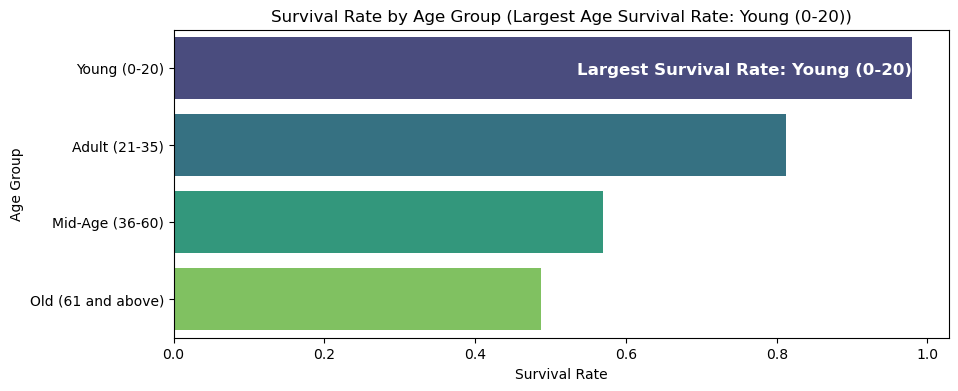

Largest Survival Rate: Young (0-20)


In [19]:
# Define age bins and labels for categorizing ages into age groups
age_bins = [0, 20, 35, 60, float('inf')]
age_labels = ["Young (0-20)", "Adult (21-35)", "Mid-Age (36-60)", "Old (61 and above)"]

# Categorize ages into age groups and add a new 'age_group' column to the DataFrame
h_df['age_group'] = pd.cut(h_df['age'], bins=age_bins, labels=age_labels)

# Calculate survival rates for each age group where 'chd' is 0 (alive)
survival_rates = h_df['age_group'][h_df['chd'] == 0].value_counts() / h_df['age_group'].value_counts()

# Find the age group with the largest survival rate and its corresponding rate
largest_survival_age_group = survival_rates.idxmax()
largest_survival_rate = survival_rates.max()

# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x=survival_rates, y=survival_rates.index, palette='viridis')

# Annotate the bar for the age group with the largest survival rate
plt.text(largest_survival_rate, 0, f"Largest Survival Rate: {largest_survival_age_group}",
         va='center_baseline', ha='right', fontsize=12, fontweight='bold', color='white')

# Customize the plot with a title and axis labels
plt.title(f"Survival Rate by Age Group (Largest Age Survival Rate: {largest_survival_age_group})")
plt.xlabel('Survival Rate')
plt.ylabel('Age Group')

# Display the plot
plt.show()

# Print the age group with the largest survival rate
print(f"Largest Survival Rate: {largest_survival_age_group}")


# Find similar relationships for at least 3-4 columns that you think can play a role in prediction

## Average Systolic Blood Pressure and Adipose Tissue Concentration by CHD Status

In [20]:
cross_tab_data = h_df.groupby('chd_label').agg({'sbp': 'mean', 'adiposity': 'mean'})

# Rename the columns for clarity
cross_tab_data = cross_tab_data.rename(columns={'sbp': 'Avg Systolic blood pressure', 'adiposity': 'Adipose tissue concentration'})

# Create a cross-tabulation
cross_tab = cross_tab_data.transpose()

# Display the cross-tabulation
cross_tab

chd_label                          Alive        Dead
Avg Systolic blood pressure   135.879464  144.132743
Adipose tissue concentration   23.784598   27.905133

In [21]:
# Create a grouped bar chart using Plotly Express with data from 'cross_tab_data' and set barmode to 'group'
fig = px.bar(cross_tab_data.transpose(), barmode='group')

# Update the layout of the figure
fig.update_layout(
    title='Average Systolic Blood Pressure and Adipose Tissue Concentration by CHD Status',
    xaxis_title='Features',
    yaxis_title='Mean Value',
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Avg Systolic BP', 'Adipose Tissue Concentration']
    ),
    legend_title='CHD Status',
    legend=dict(
        itemsizing='constant'
    )
)

# Show the plot
fig.show()


## Average Tobacco Consumption  by Age Groups

In [22]:
cross_tab_data = h_df.groupby('age_group').agg({'tobacco': 'mean'})

# Rename the columns for clarity
cross_tab_data = cross_tab_data.rename(columns={'tobacco': 'Avg tobacco consumption'})

# Create a cross-tabulation
cross_tab = cross_tab_data.transpose()

# Display the cross-tabulation
cross_tab

age_group                Young (0-20)  Adult (21-35)  Mid-Age (36-60)  \
Avg tobacco consumption      0.087083       1.388281         4.618978   

age_group                Old (61 and above)  
Avg tobacco consumption            6.284872

In [23]:
# Create a figure for the grouped bar chart
fig = px.bar(cross_tab_data.transpose(), barmode='group')

# Update the figure layout
fig.update_layout(
    title='Average Tobacco Consumption  by Age Groups',
    xaxis_title='Features',
    yaxis_title='Mean Value',
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Avg Tobacco Consumption']
    ),
    legend_title='Age Groups',
    legend=dict(
        itemsizing='constant'
    )
)

# Show the plot
fig.show()

## Average  Alcohol Consumption by Age Groups

In [24]:
cross_tab_data = h_df.groupby('age_group').agg({'alcohol': 'mean'})

# Rename the columns for clarity
cross_tab_data = cross_tab_data.rename(columns={ 'alcohol': 'Avg alcohol consumption'})

# Create a cross-tabulation
cross_tab = cross_tab_data.transpose()

# Display the cross-tabulation
cross_tab

age_group                Young (0-20)  Adult (21-35)  Mid-Age (36-60)  \
Avg alcohol consumption      2.908542      22.837813        20.457258   

age_group                Old (61 and above)  
Avg alcohol consumption           11.411538

In [25]:
# Create a figure for the grouped bar chart
fig = px.bar(cross_tab_data.transpose(), barmode='group')

# Update the figure layout
fig.update_layout(
    title='Average  Alcohol Consumption by Age Groups',
    xaxis_title='Features',
    yaxis_title='Mean Value',
    xaxis=dict(
        tickmode='array',
        tickvals=[0, 1],
        ticktext=['Avg Alcohol Consumption']
    ),
    legend_title='Age Groups',
    legend=dict(
        itemsizing='constant'
    )
)

# Show the plot
fig.show()

## Analysis on CHD (Dead or Alive ) on Family History of Present and Absent 

In [26]:
# Filter data based on 'famhist' values
famhist_present = h_df[h_df["famhist"] == 'Present']
famhist_absent = h_df[h_df["famhist"] == 'Absent']

# Separate data for different combinations of 'famhist' and 'chd' values
famhist_present_survival = famhist_present[h_df["chd"] == 0]
famhist_present_death = famhist_present[h_df["chd"] == 1]
famhist_absent_survival = famhist_absent[h_df["chd"] == 0]
famhist_absent_death = famhist_absent[h_df["chd"] == 1]

# Define labels and values for the pie chart
labels = ['famhistory_present and Alive', 'famhistory_present and Death', 'famhistory_absent and Alive', 'famhistory_absent and Death']
values = [
    len(famhist_present_survival), len(famhist_present_death),
    len(famhist_absent_survival), len(famhist_absent_death)
]

# Create a pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])

# Update the layout of the figure
fig.update_layout(
    title_text="Analysis on CHD (Dead or Alive) based on Family History of Present and Absent"
)

# Show the pie chart
fig.show()


## Coronary Heart Disease w.r.t Age and Low-density lipoprotein cholestero

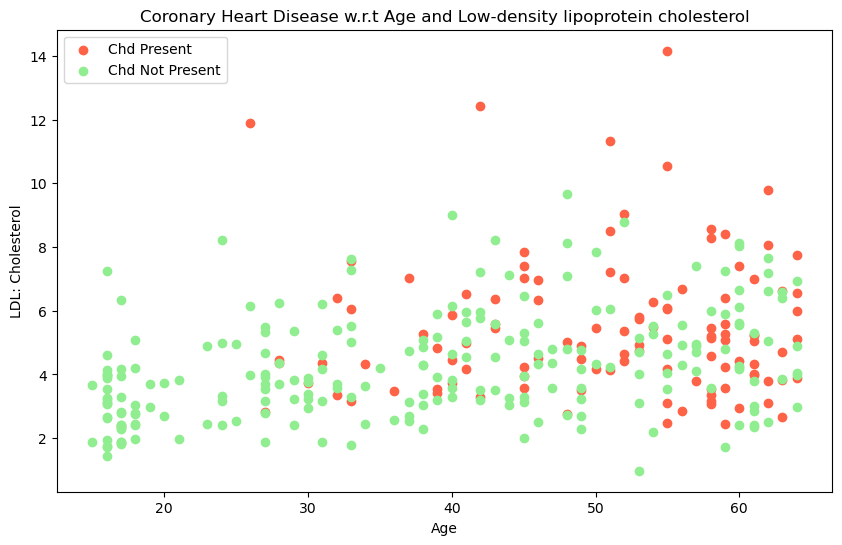

In [27]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot the values for people who have heart disease (chd=1)
plt.scatter(h_df.age[h_df.chd==1], 
            h_df.ldl[h_df.chd==1], 
            c="tomato")

# Plot the values for people who don't have heart disease (chd=0)
plt.scatter(h_df.age[h_df.chd==0], 
            h_df.ldl[h_df.chd==0], 
            c="lightgreen")

# Add title to the plot
plt.title("Coronary Heart Disease w.r.t Age and Low-density lipoprotein cholesterol")

# Label the x-axis
plt.xlabel("Age")

# Create a legend to distinguish between Chd Present and Chd Not Present
plt.legend(["Chd Present", "Chd Not Present"])

# Label the y-axis
plt.ylabel("LDL: Cholesterol")

# Show the plot
plt.show()


## Avg Obesity Value by CHD Status

In [28]:
# Group the data by 'chd_label' and calculate the mean of 'obesity', then reset the index
obesity_grp = h_df.groupby('chd_label')['obesity'].mean().reset_index()

# Create a grouped bar chart using Plotly Express
fig = px.bar(obesity_grp, x='chd_label', y='obesity',
             labels={'chd_label': 'CHD Status', 'obesity': 'Obesity Rate'},
             title='Average Obesity Value by CHD Status', color='chd_label',
             category_orders={"chd_label": ["Alive", "Dead"]})

# Customize the layout to display the bars grouped
fig.update_layout(barmode='group')

# Show the plot
fig.show()


## Mean Values Comparison of Features for Diseased and Normal People (Combined all features)

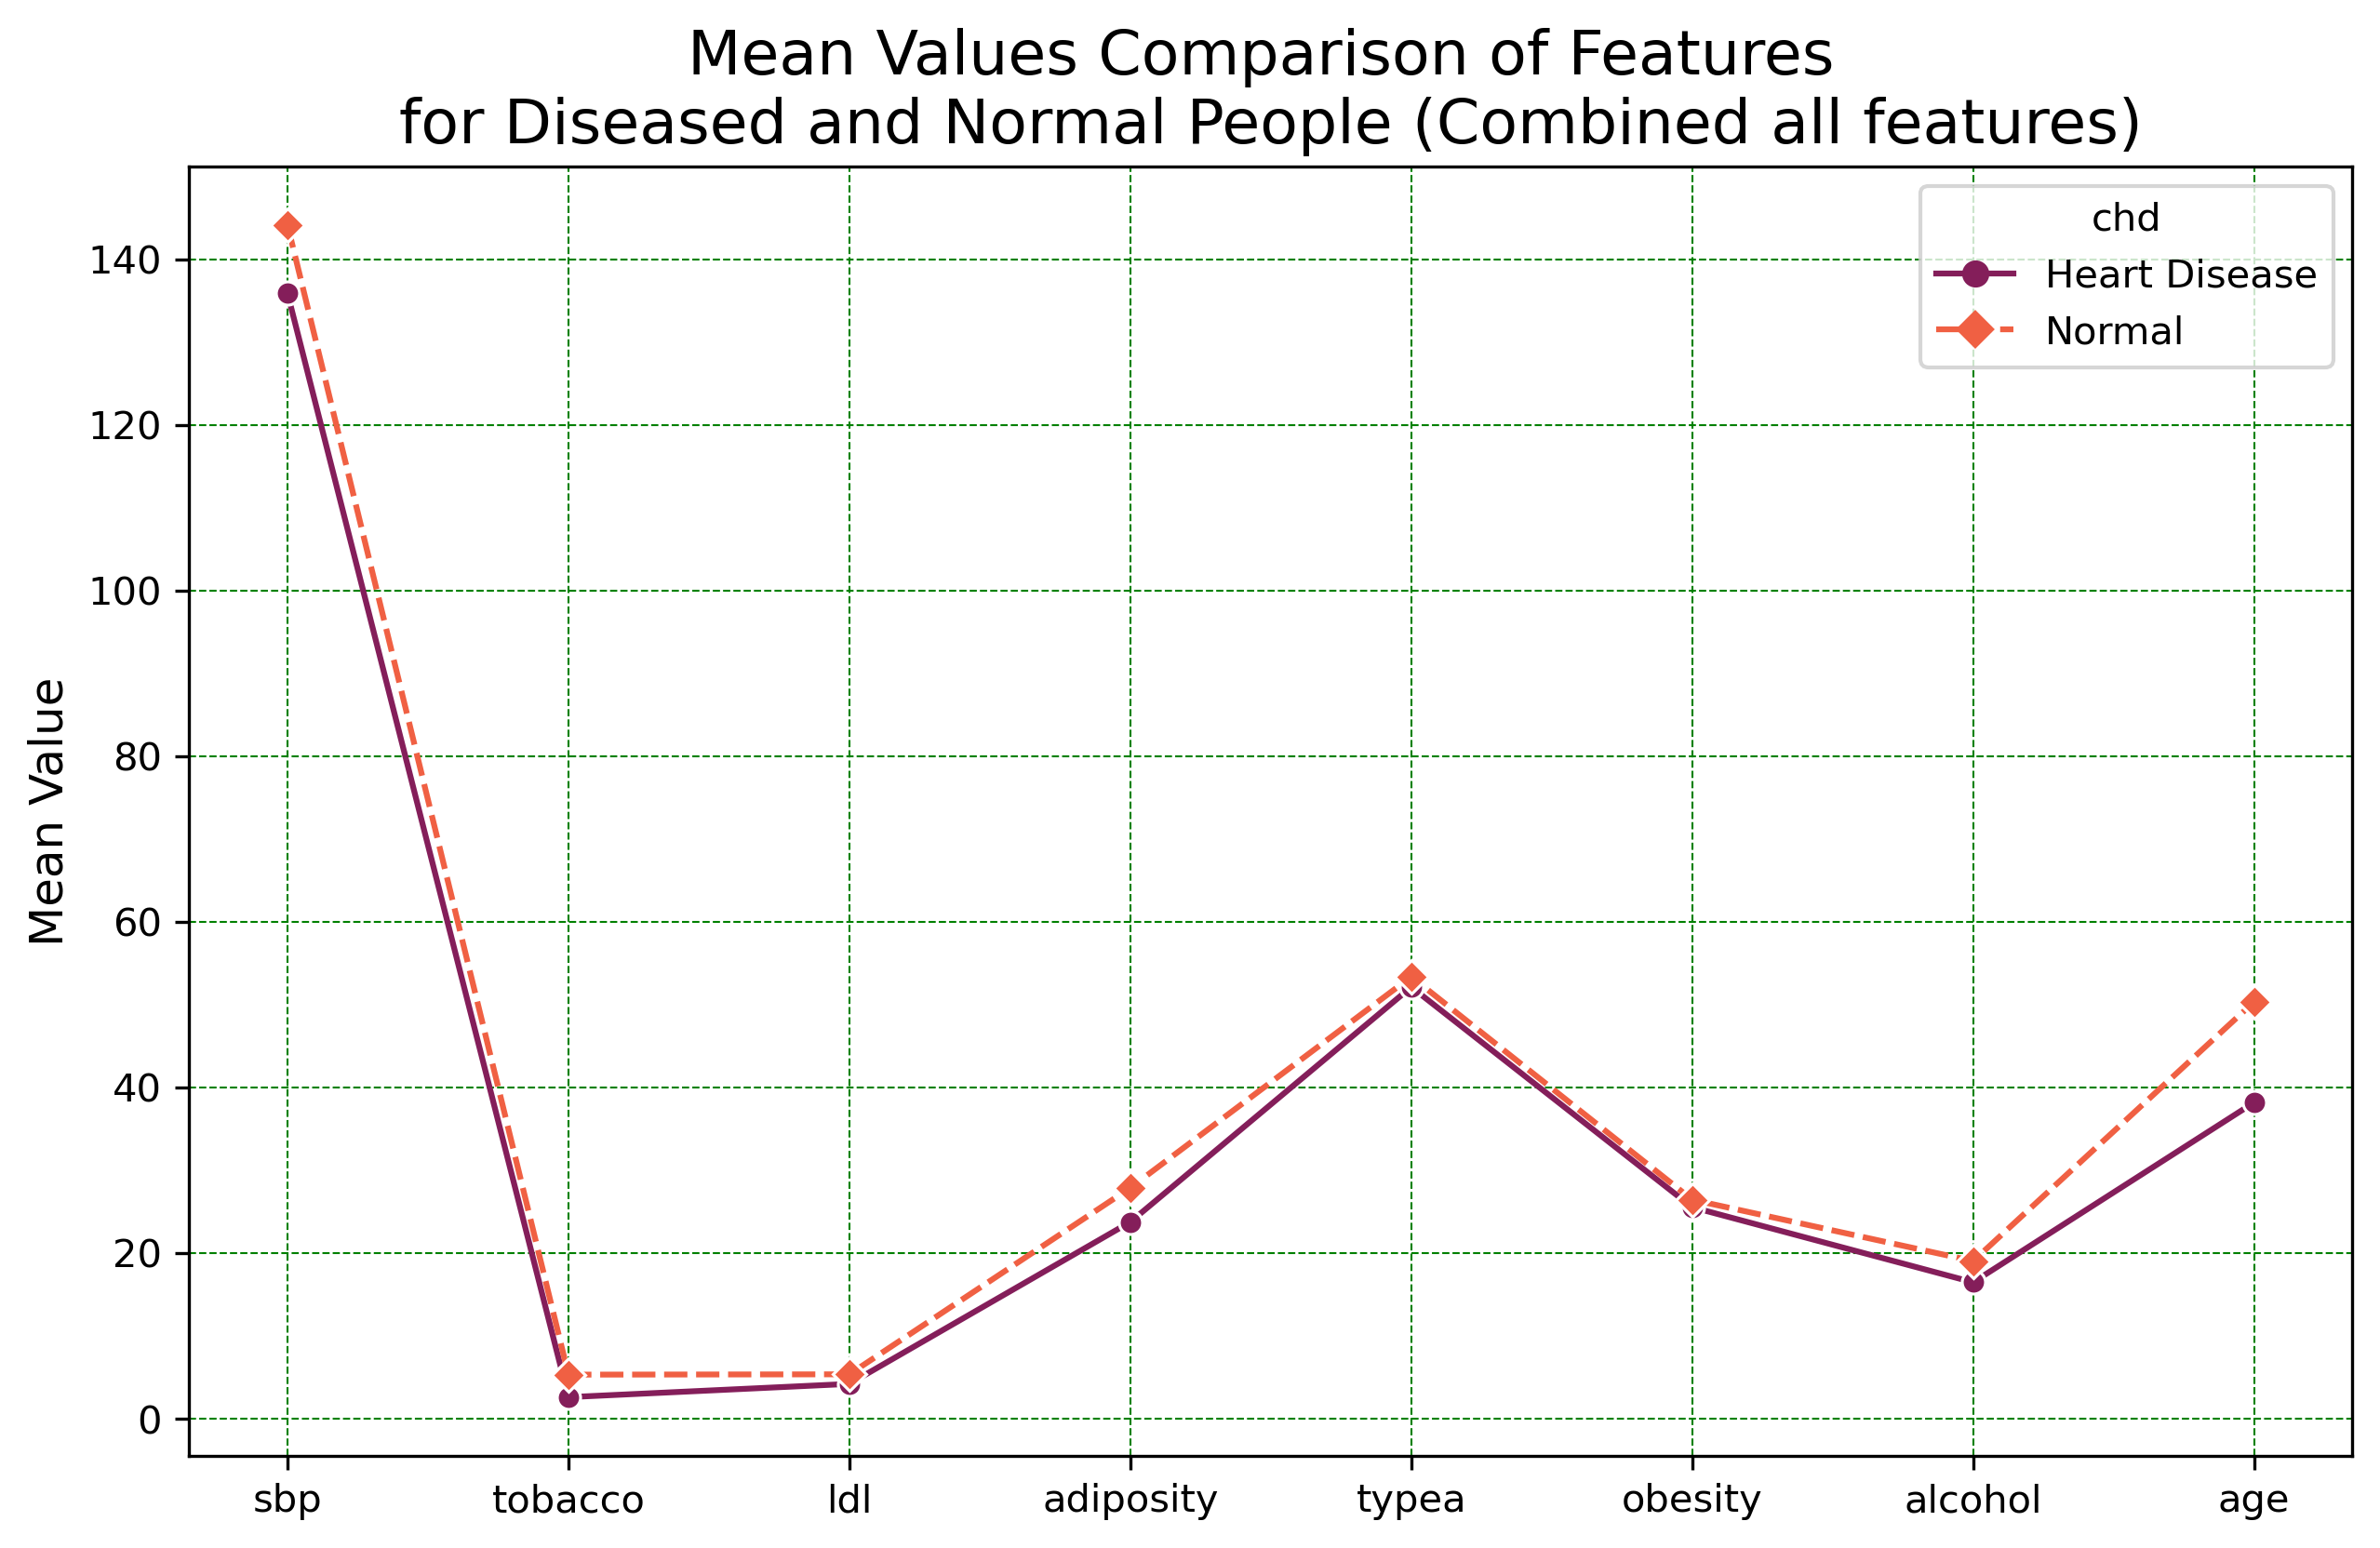

In [29]:
# Calculate the mean values for selected features grouped by 'chd' column
df_mean_comp = h_df.groupby("chd")[['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']].mean()

# Rename the index to 'Heart Disease' and 'Normal' for better clarity
df_mean_comp.rename(index={0:'Heart Disease', 1: 'Normal'}, inplace=True)

# Transpose the DataFrame for better visualization
t_df_mean = df_mean_comp.T

# Create a new figure for the plot with specified size and DPI
plt.figure(figsize=(10, 6), dpi=300)

# Create a line plot using Seaborn, setting markers, marker size, line width, and color palette
sns.lineplot(data=t_df_mean, markers=["o", "D"], markersize=6, lw=1.5, palette="rocket", sort=True)

# Add grid lines with specified color and linestyle
plt.grid(color='green', linestyle='--', linewidth=.5)

# Set the title of the plot
plt.title("Mean Values Comparison of Features \nfor Diseased and Normal People (Combined all features)", size=16)

# Set the label for the y-axis
plt.ylabel("Mean Value", size=12)

# Show the plot
plt.show()


# Get more visuals on data distributions 

## Use plotCorrelationMatrix 

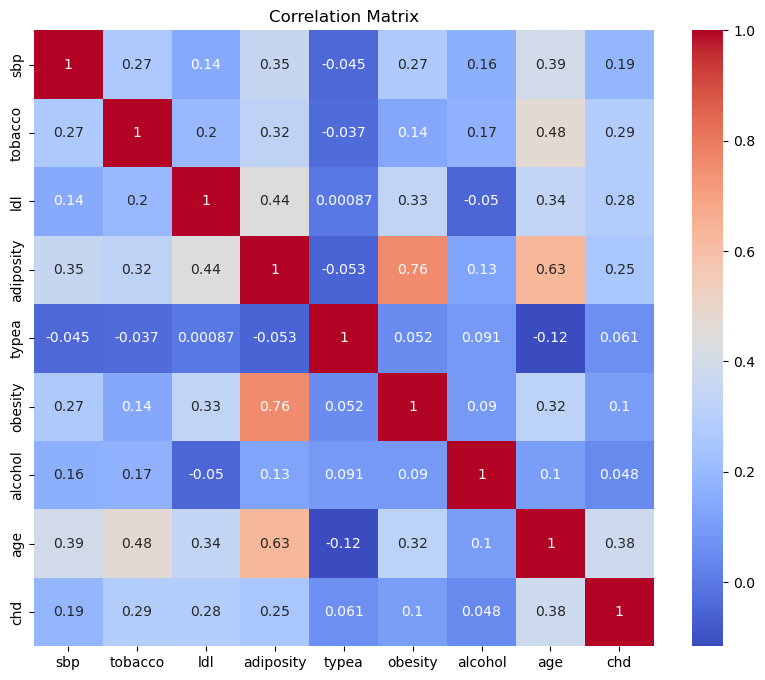

In [30]:
correlation_matrix = h_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [31]:
correlation_matrix

sbp   tobacco       ldl  adiposity     typea   obesity  \
sbp        1.000000  0.266729  0.144746   0.354361 -0.045165  0.268017   
tobacco    0.266729  1.000000  0.200752   0.322399 -0.036930  0.136497   
ldl        0.144746  0.200752  1.000000   0.443252  0.000872  0.330506   
adiposity  0.354361  0.322399  0.443252   1.000000 -0.052536  0.757865   
typea     -0.045165 -0.036930  0.000872  -0.052536  1.000000  0.051845   
obesity    0.268017  0.136497  0.330506   0.757865  0.051845  1.000000   
alcohol    0.158891  0.170477 -0.050228   0.125087  0.090792  0.089789   
age        0.392206  0.476452  0.340675   0.630901 -0.116411  0.317241   
chd        0.187654  0.285254  0.283447   0.250654  0.061232  0.104288   

            alcohol       age       chd  
sbp        0.158891  0.392206  0.187654  
tobacco    0.170477  0.476452  0.285254  
ldl       -0.050228  0.340675  0.283447  
adiposity  0.125087  0.630901  0.250654  
typea      0.090792 -0.116411  0.061232  
obesity    0.089789  0.317241  0.104288  
alcohol    1.000000  0.104267  0.048202  
age        0.104267  1.000000  0.377026  
chd        0.048202  0.377026  1.000000

## plotScatterMatrix


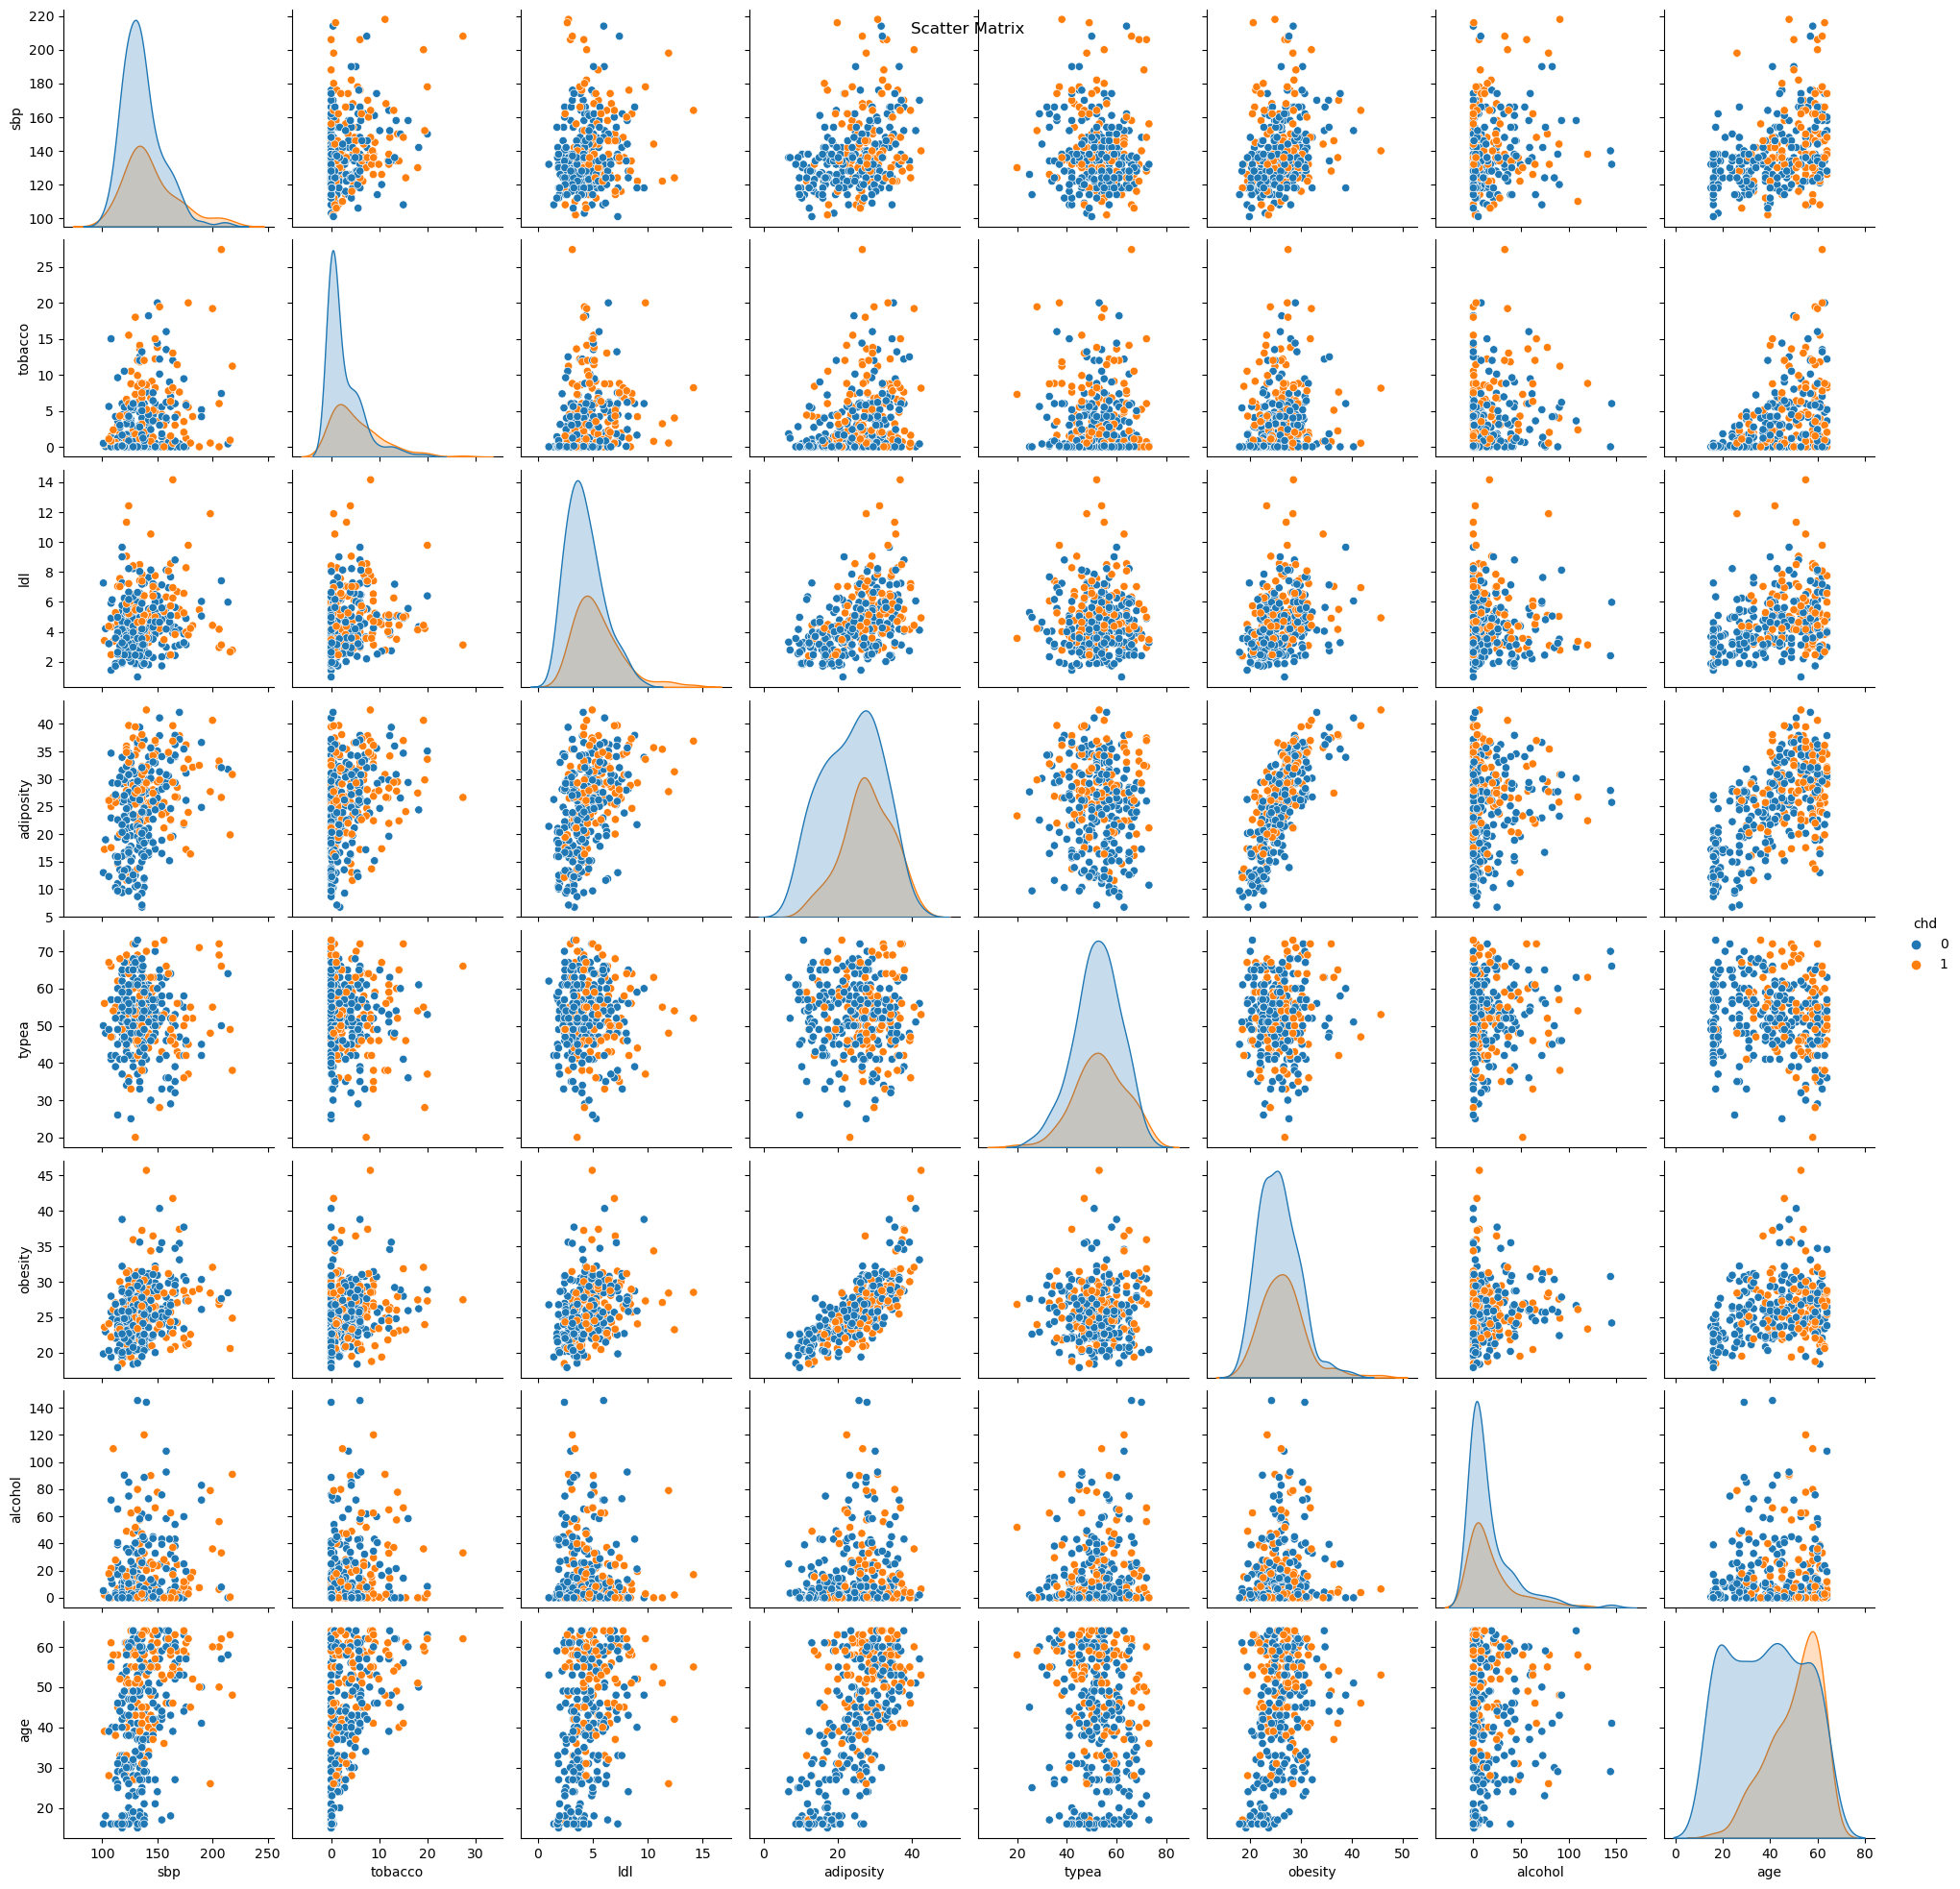

In [32]:
# Create a pair plot (scatter matrix)
sns.pairplot(h_df, diag_kind='kde', hue='chd')

# Set the plot title
plt.suptitle("Scatter Matrix")

# Display the plot
plt.show()


## plotPerColumnDistribution

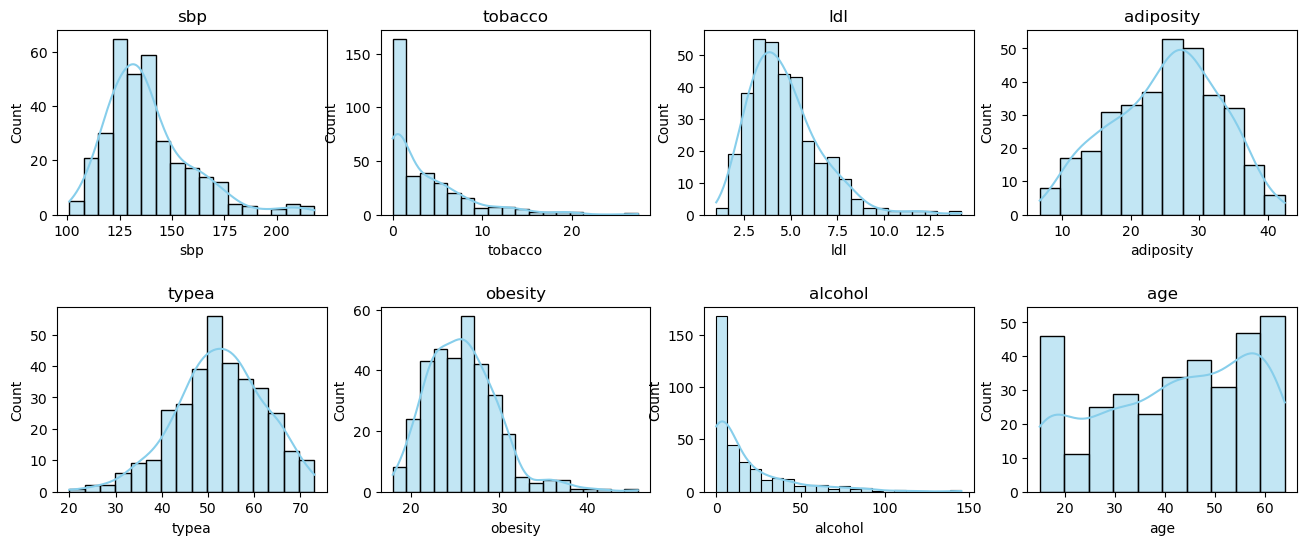

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to plot the distribution for
columns_to_plot = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

# Set the number of columns per row in the subplots
columns_per_row = 4

# Calculate the number of rows needed for subplots
num_rows = len(columns_to_plot) // columns_per_row
if len(columns_to_plot) % columns_per_row != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(16, 3 * num_rows))
fig.subplots_adjust(hspace=0.5)

# Iterate through the selected columns and create distribution plots
for i, column in enumerate(columns_to_plot):
    row = i // columns_per_row
    col = i % columns_per_row
    ax = axes[row, col]
    
    # Create a distribution plot for the current column
    sns.histplot(h_df[column], kde=True, ax=ax, color='skyblue')
    
    # Set the title for the subplot
    ax.set_title(column)
    
# Remove empty subplots if necessary
for i in range(len(columns_to_plot), num_rows * columns_per_row):
    fig.delaxes(axes[i // columns_per_row, i % columns_per_row])

# Display the plot
plt.show()


## Check for the missing values, If they exist

## i. Find Missing Values


In [34]:
missing_values = h_df.isnull()
missing_values

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  \
0    False    False  False      False    False  False    False    False   
1    False    False  False      False    False  False    False    False   
2    False    False  False      False    False  False    False    False   
3    False    False  False      False    False  False    False    False   
4    False    False  False      False    False  False    False    False   
..     ...      ...    ...        ...      ...    ...      ...      ...   
332  False    False  False      False    False  False    False    False   
333  False    False  False      False    False  False    False    False   
334  False    False  False      False    False  False    False    False   
335  False    False  False      False    False  False    False    False   
336  False    False  False      False    False  False    False    False   

       age    chd  age_group  chd_label  
0    False  False      False      False  
1    False  False      False      False  
2    False  False      False      False  
3    False  False      False      False  
4    False  False      False      False  
..     ...    ...        ...        ...  
332  False  False      False      False  
333  False  False      False      False  
334  False  False      False      False  
335  False  False      False      False  
336  False  False      False      False  

[337 rows x 12 columns]

##  Get the Count of Missing Values


In [35]:
missing_count = missing_values.sum()
missing_count

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
age_group    0
chd_label    0
dtype: int64

##  Plot a Heatmap for Missing Values


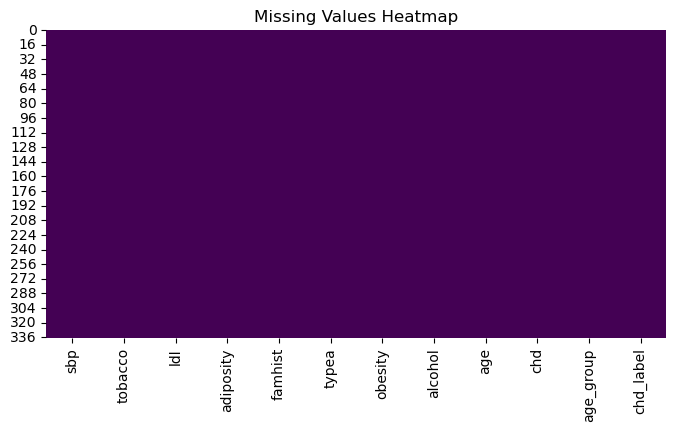

In [36]:

plt.figure(figsize=(8, 4))
sns.heatmap(missing_values, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [37]:
# Display the count of missing values for each column
print("Missing Values Count:")
print(missing_count)

Missing Values Count:
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
age_group    0
chd_label    0
dtype: int64


# Applying the feature scaling technique if you think it is required.

from sklearn.preprocessing import StandardScaler

Select the columns you want to scale
columns_to_scale = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

Initialize the StandardScaler
scaler = StandardScaler()

Fit and transform the selected columns
h_df[columns_to_scale] = scaler.fit_transform(h_df[columns_to_scale])


from sklearn.preprocessing import MinMaxScaler

 Create a scaler object
scaler = MinMaxScaler()

Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(your_data)


It's essential to test your model's performance with and without scaling to determine if it has a significant impact on the results.

## Applying the regression models that is given below.

### Data Preprocessing:

In [38]:
#drop category , text based columns 
h_df = h_df.drop(['age_group', 'chd_label','famhist'], axis=1)


### Splitting the Training Dataset:

In [39]:
# Extract independent features from the training dataset (all columns except the last one)
X_train = h_df.iloc[:, :-1]

# Extract the dependent feature (the last column) from the training dataset
Y_train = h_df.iloc[:, -1]


### Hyperparameter Tuning using GridSearchCV:



In [40]:
# Read the test dataset from a CSV file ('heart_test.csv')
ht_df = pd.read_csv('heart_test.csv')

# Drop the 'ID' and 'famhist' columns from the DataFrame
ht_df = ht_df.drop(['ID', 'famhist'], axis=1)

# Assign the DataFrame with independent features to the variable X_test
X_test = ht_df


In [41]:
# Import the LogisticRegression class from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression classifier
classifier = LogisticRegression()

# Import GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
    'max_iter': [100, 200, 300]
}

# Create a GridSearchCV object to search for the best hyperparameters
classifier_regressor = GridSearchCV(classifier, param_grid=parameters, scoring='accuracy', cv=5)

# Fit the GridSearchCV to the training data to find the best hyperparameters
classifier_regressor.fit(X_train, Y_train)




GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

### Model Evaluation:



In [42]:
print(classifier_regressor.best_score_)



0.7002633889376646


### Making Predictions:



In [43]:
##prediction
y_pred=classifier_regressor.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

## we cannot perform these below operation beacuse we dont have y_test data present in heart_test.csv (chd column is missing)

In [44]:
'''
print("Test: ", logistic_regression.score(x, y))
print("MSE:”,mean_squared_error(logistic_regression.predi ct(x), y, squared=True))

'''

'\nprint("Test: ", logistic_regression.score(x, y))\nprint("MSE:”,mean_squared_error(logistic_regression.predi ct(x), y, squared=True))\n\n'

# Part 2: 

### Price Dataset Analysis In this part, we shift our focus to the "Price.csv" dataset. Our objective is to conduct a comprehensive exploratory data analysis. We will delve into the dataset's characteristics, perform data preprocessing, and derive meaningful insights from the data. Python will be our tool of choice for this analysis.


# Import necessary libraries


In [45]:
import pandas as pd  # For loading files and performing tasks
import numpy as np   # For linear algebra operations
import seaborn as sns  # For data visualizations
import matplotlib.pyplot as plt  # For data visualizations
import plotly  # For interactive plotting
from scipy import stats  # For statistical operations
from scipy.stats import shapiro  # For the Shapiro-Wilk test
import seaborn as sns  # For additional data visualizations
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler 
# Ignore warnings to improve code readability


import warnings
warnings.filterwarnings('ignore')


# Load the dataset and perform initial data exploration.

In [46]:
# Read a CSV file named 'Price.csv' and store its contents in a DataFrame called 'df'
df = pd.read_csv('Price.csv')



In [47]:
df_shape = df.shape
print("The shape of the DataFrame is:", df_shape)


The shape of the DataFrame is: (4600, 18)


In [48]:
# Determine the dataset dimensions
num_rows = df.shape[0]  # Number of houses
num_columns = df.shape[1]  # Number of features

# Report on the dataset dimensions
print(f"The dataset comprises {num_rows} houses and {num_columns} features.")
print(f"Among the {num_columns} features, one of them is the 'price'. This means we have {num_columns - 1} different features that could potentially influence a house's price. Let's explore these features further.")


The dataset comprises 4600 houses and 18 features.
Among the 18 features, one of them is the 'price'. This means we have 17 different features that could potentially influence a house's price. Let's explore these features further.


In [49]:
df.head(3)


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0         3        1.5         1340      7912   
1  2014-05-02 00:00:00  2384000.0         5        2.5         3650      9050   
2  2014-05-02 00:00:00   342000.0         3        2.0         1930     11947   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA

In [50]:
df.tail(3)

#df = df.drop(df[df['price'] == 0].index)

date          price  bedrooms  bathrooms  sqft_living  \
4597  2014-07-09 00:00:00  416904.166667         3        2.5         3010   
4598  2014-07-10 00:00:00  203400.000000         4        2.0         2090   
4599  2014-07-10 00:00:00  220600.000000         3        2.5         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated             street       city  \
4597              0      2009             0   759 Ilwaco Pl NE     Renton   
4598           1020      1974             0  5148 S Creston St    Seattle   
4599              0      1990             0  18717 SE 258th St  Covington   

      statezip country  
4597  WA 98059     USA  
4598  WA 98178     USA  
4599  WA 98042     USA

The nunique() method is used to count the number of unique values in each column of a DataFrame.

In [51]:
# Calculate the number of unique values in each column
unique_counts = df.nunique()

# Display the count of unique values in a transposed format
print("Count of Unique Values in Each Column (Transposed):")
print(unique_counts)

Count of Unique Values in Each Column (Transposed):
date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64


In [52]:
# Count the number of duplicated rows in the DataFrame
duplicated_count = df.duplicated().sum()

# Print the result
print("Number of Duplicated Rows:", duplicated_count)

Number of Duplicated Rows: 0


In [53]:
# Calculate and print the value counts for the 'country' column
print("Value Counts for 'country' column:")

df['country'].value_counts()

Value Counts for 'country' column:


USA    4600
Name: country, dtype: int64

# Identify the types of variables present and categorize them.

In [54]:
num_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 
            'sqft_lot', 'floors', 'yr_built', 'yr_renovated']

cat_cols = ['waterfront', 'view', 'condition', 'street', 
            'city', 'statezip', 'country']

In [55]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')
Numerical Variables:
['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


# Obtain insights about the data.

## Find the number of missing values for each column.


In [56]:
# Calculate the count of null values in each column
null_counts = df.isnull().sum()

# Create a DataFrame to store column names and their corresponding null counts
null_counts_df = pd.DataFrame({'Columns': null_counts.index, 'Null Count': null_counts.values})

# Create a dictionary to store data type, non-null counts, and null counts
info_data = {
    'Data Type': df.dtypes.tolist(),
    'Non-Null counts': df.count().tolist(),
    'Null counts': df.isnull().sum()
}

# Create a DataFrame to store the information
info_df = pd.DataFrame(info_data)

# Print data types, null and non-null counts info in a transposed format
print("Data Types, Null, and Non-null Counts Info:")
info_df.T

Data Types, Null, and Non-null Counts Info:


date    price bedrooms bathrooms sqft_living sqft_lot  \
Data Type        object  float64    int64   float64       int64    int64   
Non-Null counts    4600     4600     4600      4600        4600     4600   
Null counts           0        0        0         0           0        0   

                  floors waterfront   view condition sqft_above sqft_basement  \
Data Type        float64      int64  int64     int64      int64         int64   
Non-Null counts     4600       4600   4600      4600       4600          4600   
Null counts            0          0      0         0          0             0   

                yr_built yr_renovated  street    city statezip country  
Data Type          int64        int64  object  object   object  object  
Non-Null counts     4600         4600    4600    4600     4600    4600  
Null counts            0            0       0       0        0       0

## Calculate summary statistics for numerical columns, such as mean, median, standard deviation, etc.

In [57]:
# Generate summary statistics for the numeric columns in the DataFrame
summary_statistics = df.describe()

# Display the summary statistics
print("Summary Statistics:")
summary_statistics


Summary Statistics:


price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

The $0 price is likely an invalid or outlier value, and it will be removed during exploratory data analysis (EDA) to ensure data quality and accuracy in subsequent analyses.

In [58]:

# Remove rows where the 'House Price' is $0
df = df[df['price'] > 0]


In [59]:
#df["price"] = np.log1p(df["price"])

## Analyze the distribution of the numerical feature “price” using a distribution plot such as a histogram.

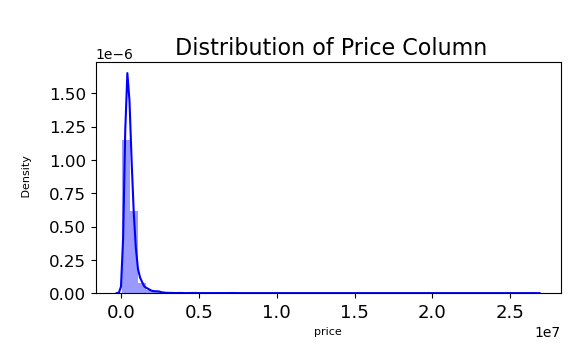

In [60]:
 plt.figure(figsize=(6,3))
plt.title('\n Distribution of Price Column', size=16, color='black')
plt.xlabel('\n Price \n', fontsize=8, color='black')
plt.ylabel('\n Density\n', fontsize=8, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df.price,color="blue")
plt.show()


The histogram's rightward tail indicates a positively skewed distribution with a few notably high values.

In [61]:
# Calculate the mean
mean = np.mean(df['price'])

# Calculate the median
median = np.median(df['price'])

# Calculate the mode
mode = np.bincount(df['price']).argmax()

# Print the results
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)

Mean: 557905.8991379443
Median: 465000.0
Mode: 300000


### Use the Shapiro-Wilk test to do a normality test and check if the “price” feature follows the normal distribution (if the p-value is greater than 0.05 then the feature follows the Normal distribution)

In [62]:
# Perform Shapiro-Wilk test
shapiro_test_statistic, shapiro_p_value = stats.shapiro(df['price'])


print('shapiro_p_value ', shapiro_p_value)
print(' ')
# Check the p-value
if shapiro_p_value > 0.05:
    print("The 'price' feature follows a normal distribution (p-value =", shapiro_p_value, ")")
else:
    print("The 'price' feature does not follow a normal distribution (p-value =", shapiro_p_value, ")")


shapiro_p_value  0.0
 
The 'price' feature does not follow a normal distribution (p-value = 0.0 )


### Consider the Hypothesis "The year built has a significant impact on sale price.”. Do a hypothesis test using a t-test: split into two groups: properties built before 1990 and those built-in or after 1990. (alpha/confidence interval= 95%)

The first step is to visually inspect the standard deviations of the two groups using:


In [63]:
# Split the data into two groups based on the year built
before_1990_price_df = df[df['yr_built'] < 1990]['price']
after_1990_price_df = df[df['yr_built'] >= 1990]['price']


In [64]:
print('before_1990 :',np.var(before_1990_price_df))  
print('after_1990 :', np.var(after_1990_price_df))

before_1990 : 183059115410.90204
after_1990 : 589663985224.3052


Since the variances between the two groups are quite different, it suggests the variances are not equal.
Unequal variances violate the assumption of equal variance required for the Student's t-test.
Therefore, we should perform Welch's t-test instead, which does not assume equal variance. Welch's t-test 
adjusts the degrees of freedom to account for the unequal variance.

In [65]:
# Calculate the t-statistic and p-value
t_statistic, p_value = stats.ttest_ind(before_1990_price_df, after_1990_price_df)

# Print the results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis.')
    print('There is a significant difference in sale price between properties built before 1990 and those built in or after 1990.')
else:
    print('Fail to reject the null hypothesis.')
    print('There is no significant difference in sale price between properties built before 1990 and those built in or after 1990.')

t-statistic: -5.039544971748673
p-value: 4.84741878979518e-07
Reject the null hypothesis.
There is a significant difference in sale price between properties built before 1990 and those built in or after 1990.


### Consider the Hypothesis "The year built has a significant impact on sale price.Do a Hypothesis test using ANOVA: Assume that you have 3 groups: groupA has all houses built in 1990, groupB has all houses that were built in 2000 and groupC has all houses built in 2010 (alpha/confidence interval = 95%)


In [66]:
# Filter dataframe into 3 groups 
groupA = df[df['yr_built'] == 1990]['price']
groupB = df[df['yr_built'] == 2000]['price'] 
groupC = df[df['yr_built'] == 2010]['price']

# Calculate the F-statistic and p-value
F_statistic, p_value = f_oneway(groupA, groupB, groupC)

# Print the results
print('F-statistic:', F_statistic)
print('p-value:', p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis.')
    print('There is a significant difference in sale price between the three groups.')
else:
    print('Fail to reject the null hypothesis.')
    print('There is no significant difference in sale price between the three groups.')

F-statistic: 3.542687812955503
p-value: 0.031538378873099855
Reject the null hypothesis.
There is a significant difference in sale price between the three groups.


the conclusions of both these tests are the same: The year built significantly impacts the house sale price. However, the ANOVA test provides a more granular analysis by comparing three different years rather than just a split at 1990. This might reveal more subtle differences in property prices depending on the exact year of construction.

## Calculate the covariance matrix of the numerical features present in the dataset.

In [67]:
numerical_columns = df.select_dtypes(include=['number'])

cov_matrix = numerical_columns.cov()

# Print the covariance matrix
#print(covariance_matrix)
cov_matrix

price       bedrooms      bathrooms   sqft_living  \
price          3.180169e+11  107243.011741  149347.566706  2.401606e+08   
bedrooms       1.072430e+05       0.818292       0.384579  5.154355e+02   
bathrooms      1.493476e+05       0.384579       0.602721  5.619681e+02   
sqft_living    2.401606e+08     515.435491     561.968054  9.138398e+05   
sqft_lot       1.041386e+09    2314.310999    3052.614074  7.332107e+06   
floors         4.639177e+04       0.085846       0.204675  1.768437e+02   
waterfront     6.849741e+03      -0.000404       0.003978  8.336886e+00   
view           1.047048e+05       0.079676       0.122129  2.263333e+02   
condition      1.480774e+04       0.014058      -0.063301 -4.035719e+01   
sqft_above     1.834220e+08     375.392046     455.863370  7.152485e+05   
sqft_basement  5.673853e+07     140.043445     106.104684  1.985913e+05   
yr_built       3.651357e+05       3.809234      10.725916  8.100403e+03   
yr_renovated  -1.603606e+07     -55.125063    -165.883118 -1.138412e+05   

                   sqft_lot        floors   waterfront           view  \
price          1.041386e+09  46391.773902  6849.741324  104704.750865   
bedrooms       2.314311e+03      0.085846    -0.000404       0.079676   
bathrooms      3.052614e+03      0.204675     0.003978       0.122129   
sqft_living    7.332107e+06    176.843701     8.336886     226.333289   
sqft_lot       1.293415e+09     82.222292    50.667820    1996.366664   
floors         8.222229e+01      0.290016     0.000689       0.013181   
waterfront     5.066782e+01      0.000689     0.006550       0.021530   
view           1.996367e+03      0.013181     0.021530       0.585795   
condition      2.255696e+01     -0.099547     0.000334       0.032328   
sqft_above     6.735723e+06    240.296856     5.013703     114.202904   
sqft_basement  5.963837e+05    -63.453155     3.323183     112.130384   
yr_built       5.261935e+04      7.479526    -0.077114      -1.511155   
yr_renovated  -7.420896e+05   -124.461605     1.254083      19.374416   

                  condition    sqft_above  sqft_basement       yr_built  \
price          14807.742591  1.834220e+08   5.673853e+07  365135.721487   
bedrooms           0.014058  3.753920e+02   1.400434e+02       3.809234   
bathrooms         -0.063301  4.558634e+02   1.061047e+02      10.725916   
sqft_living      -40.357187  7.152485e+05   1.985913e+05    8100.403334   
sqft_lot          22.556962  6.735723e+06   5.963837e+05   52619.349001   
floors            -0.099547  2.402969e+02  -6.345315e+01       7.479526   
waterfront         0.000334  5.013703e+00   3.323183e+00      -0.077114   
view               0.032328  1.142029e+02   1.121304e+02      -1.511155   
condition          0.455841 -1.018495e+02   6.149235e+01      -8.014748   
sqft_above      -101.849538  7.300897e+05  -1.484123e+04   10335.097185   
sqft_basement     61.492350 -1.484123e+04   2.134326e+05   -2234.693851   
yr_built          -8.014748  1.033510e+04  -2.234694e+03     885.661968   
yr_renovated    -121.992415 -1.349713e+05   2.113010e+04   -9412.895919   

               yr_renovated  
price         -1.603606e+07  
bedrooms      -5.512506e+01  
bathrooms     -1.658831e+02  
sqft_living   -1.138412e+05  
sqft_lot      -7.420896e+05  
floors        -1.244616e+02  
waterfront     1.254083e+00  
view           1.937442e+01  
condition     -1.219924e+02  
sqft_above    -1.349713e+05  
sqft_basement  2.113010e+04  
yr_built      -9.412896e+03  
yr_renovated   9.592664e+05

## Create a heatmap of the covariance matrix. What do the colors in the heatmap represent?

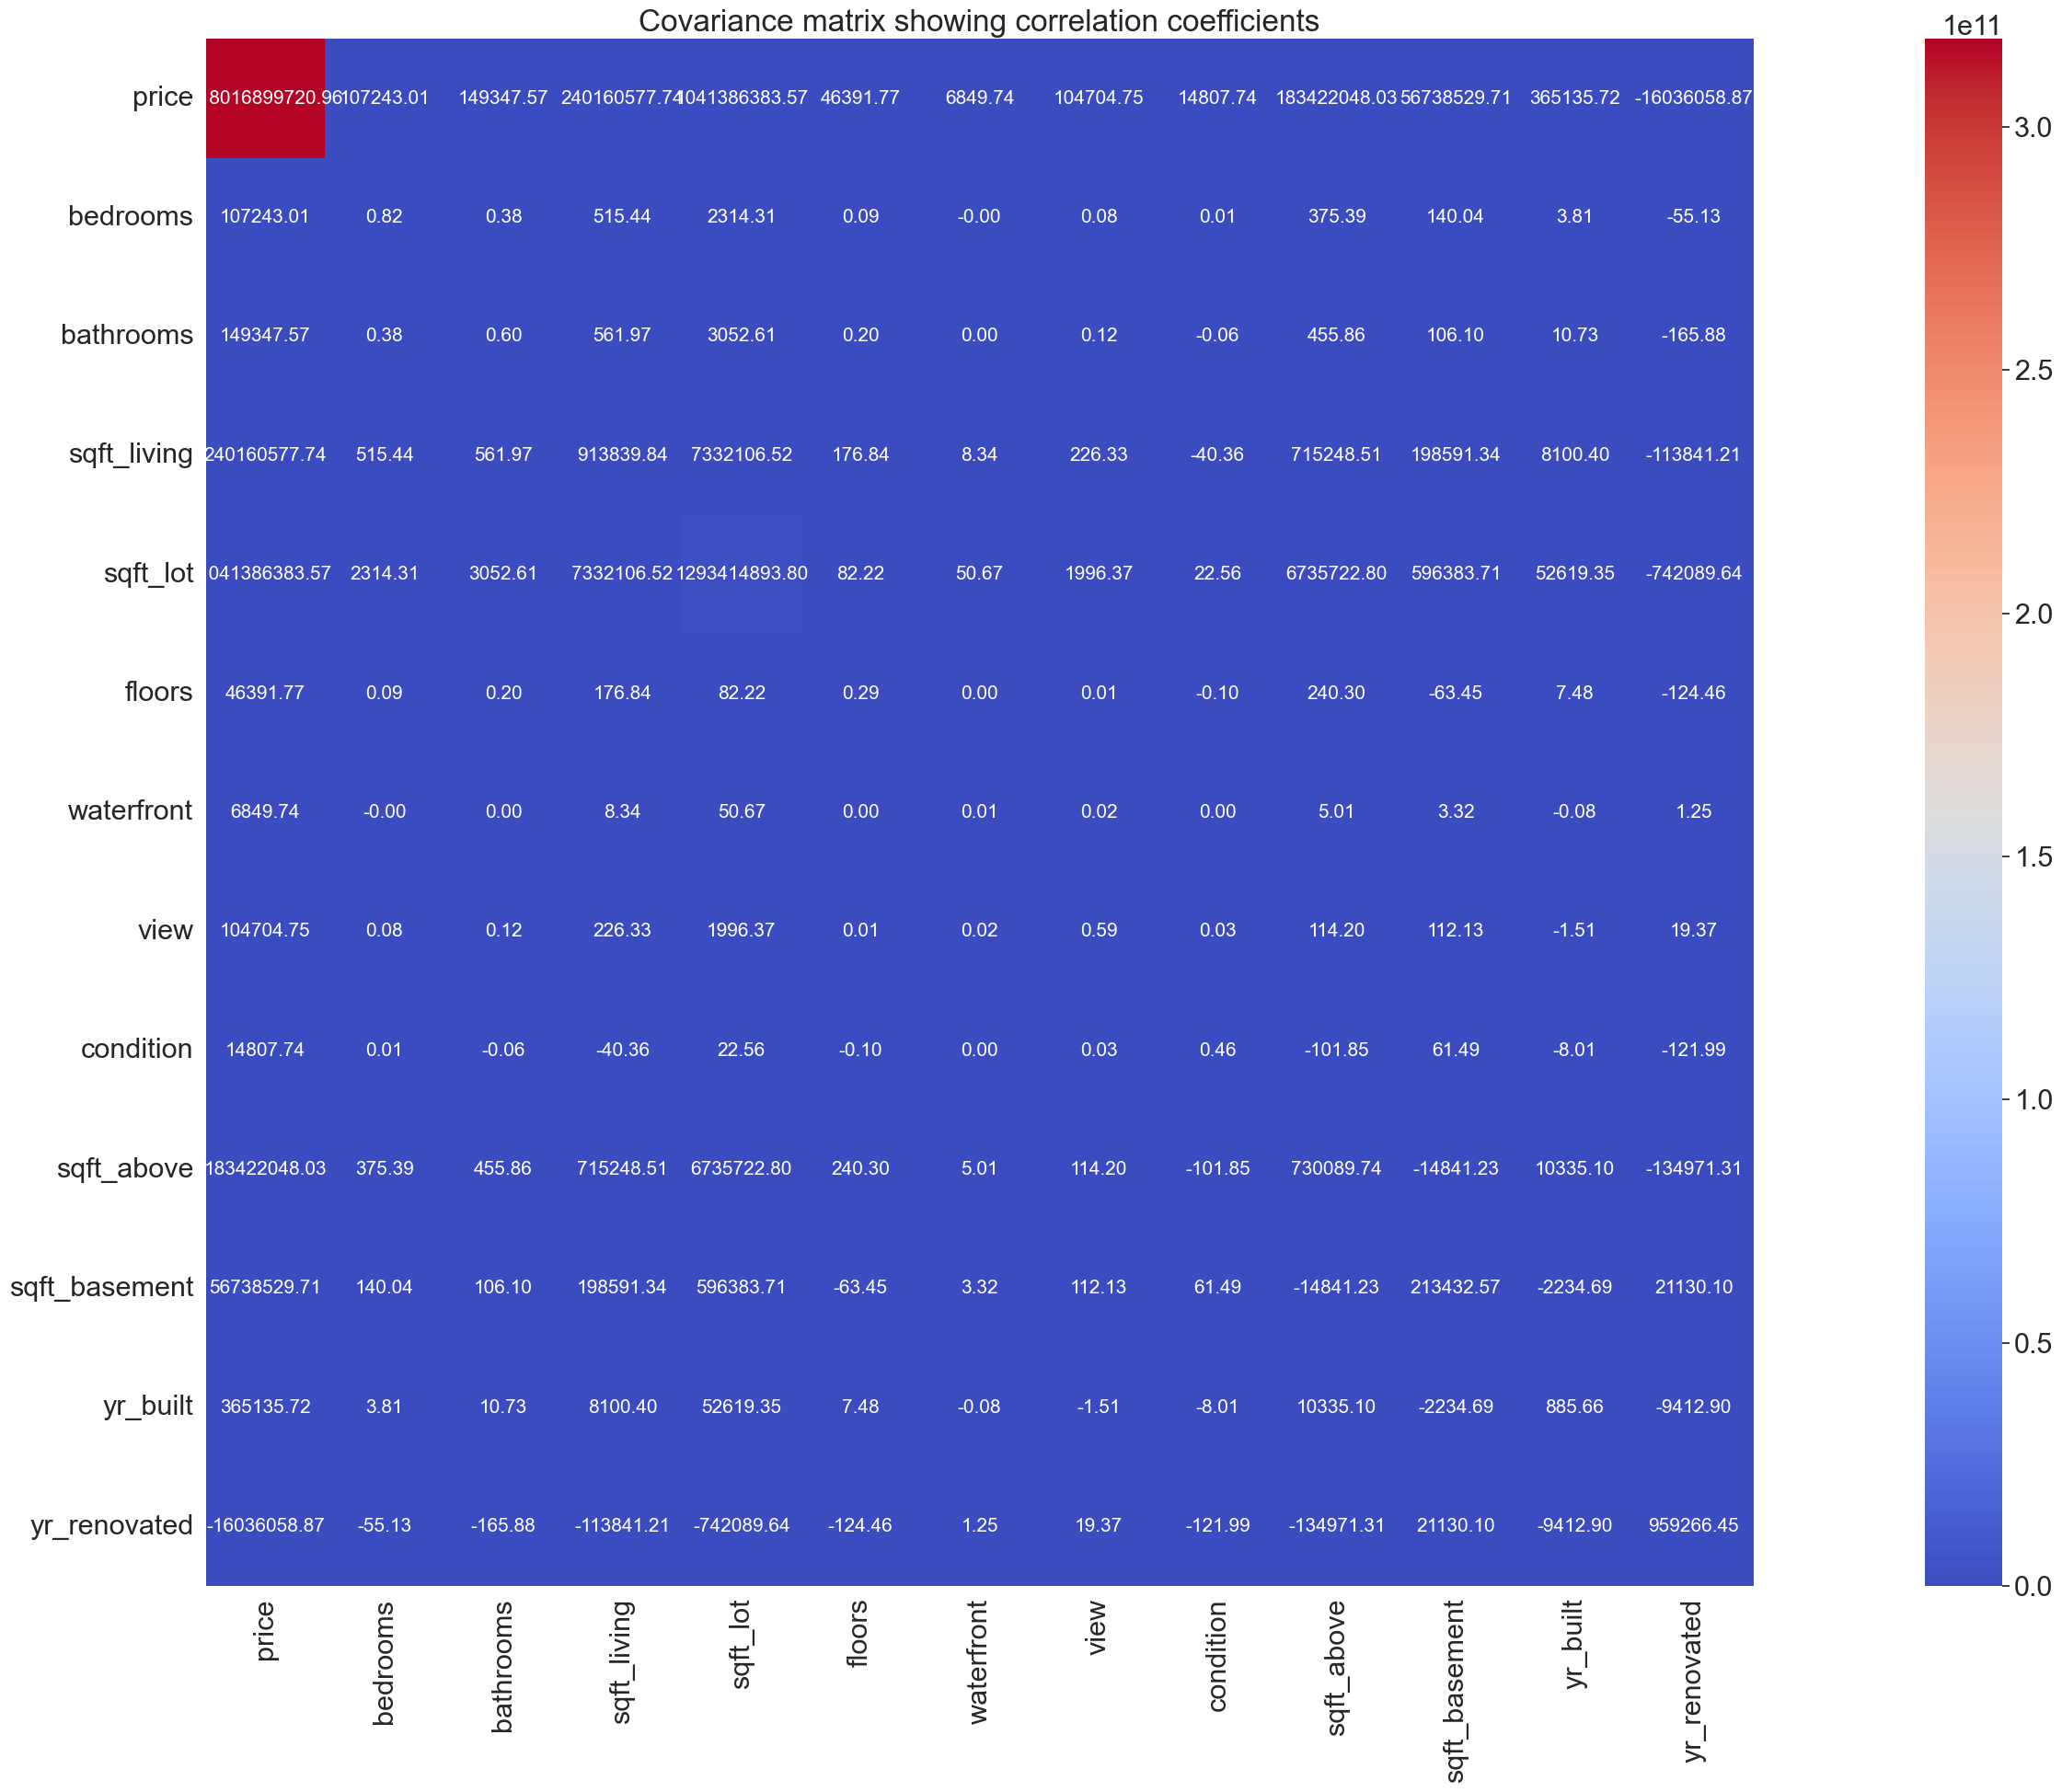

In [68]:

# Set the figure size
plt.figure(figsize=(38,20))  # Adjust the width and height as needed

# Set the font scale
sns.set(font_scale=2)

# Create the heatmap
hm = sns.heatmap(df.cov(),
                cbar=True,
                cmap="coolwarm",
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=numerical_columns.columns,
                xticklabels=numerical_columns.columns)

# Set the title
plt.title('Covariance matrix showing correlation coefficients')

# Automatically adjust the subplot parameters to give a tight layout
plt.tight_layout()

# Show the plot
plt.show()

###  Red: Strong positive correlation
###  Dark blue: Strong negative correlation
###  Light blue: Weak negative correlation
###  Light red: Weak positive correlation
###  Gray: No correlation


In [69]:
df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 
            'sqft_lot', 'floors', 'yr_built', 'yr_renovated']]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05         3       1.50         1340      7912     1.5   
1     2.384000e+06         5       2.50         3650      9050     2.0   
2     3.420000e+05         3       2.00         1930     11947     1.0   
3     4.200000e+05         3       2.25         2000      8030     1.0   
4     5.500000e+05         4       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05         3       1.75         1510      6360     1.0   
4596  5.343333e+05         3       2.50         1460      7573     2.0   
4597  4.169042e+05         3       2.50         3010      7014     2.0   
4598  2.034000e+05         4       2.00         2090      6630     1.0   
4599  2.206000e+05         3       2.50         1490      8102     2.0   

      yr_built  yr_renovated  
0         1955          2005  
1         1921             0  
2         1966             0  
3         1963             0  
4         1976          1992  
...        ...           ...  
4595      1954          1979  
4596      1983          2009  
4597      2009             0  
4598      1974             0  
4599      1990             0  

[4551 rows x 8 columns]

## Compute the eigenvalue, eigenvector, and Rank of the covariance matrix.

In [70]:


# Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Calculate the rank of the covariance matrix
rank = np.linalg.matrix_rank(cov_matrix)

# Print the results
print("Eigenvalues:")
print(eigenvalues.real)  # real parts of eigenvalues

print("\nEigenvectors:")
print(eigenvectors)



Eigenvalues:
[ 3.18020622e+11  1.29005375e+09  1.27554724e+06  8.87709303e+05
  2.92564548e+05  6.51808120e+02  5.70779037e-01  4.62690998e-01
  3.28579061e-01  2.33144342e-01  1.26056676e-01  5.69156820e-03
 -1.72005241e-09]

Eigenvectors:
[[ 9.99994126e-01 -3.29455463e-03 -8.61349755e-04 -3.72372446e-04
   1.16404433e-04 -6.22239184e-06 -1.75545388e-07  8.02325603e-08
  -2.94408839e-08 -8.24208030e-08 -1.26351178e-08  1.11553959e-08
  -6.51741334e-15]
 [ 3.37244246e-07  1.52350320e-06  3.87301779e-04  2.16749308e-04
  -3.14578999e-04  4.92375142e-04 -8.06919427e-01 -5.29128141e-01
  -8.39699162e-02 -2.30306898e-01 -9.37009605e-02 -5.64094163e-03
  -5.54682672e-08]
 [ 4.69647031e-07  1.98878088e-06  4.53851099e-04  1.22858545e-04
  -1.50085458e-04 -7.09307750e-03 -1.55346011e-01 -1.77636784e-01
  -1.27822400e-01  7.56210198e-01  5.96715827e-01  1.83898819e-04
   1.97088895e-08]
 [ 7.55247937e-04  5.07640283e-03  6.63307034e-01  3.47032285e-01
  -3.25923532e-01  2.48455772e-03  2.96965

In [71]:
# Print the rank of the covariance matrix
print("\nRank of the covariance matrix:", rank)


Rank of the covariance matrix: 12


## Calculate the inverse of the covariance matrix

In [72]:
# Calculate the inverse of the covariance matrix
cov_matrix_inverse = np.linalg.inv(cov_matrix)

# Print the inverse covariance matrix
print("Inverse of the Covariance Matrix:")
print(cov_matrix_inverse)


Inverse of the Covariance Matrix:
[[ 4.11920327e-12  2.43690410e-07 -2.98290164e-07 -8.24274012e-10
   3.12102423e-12 -1.18191651e-07 -1.96990698e-06 -2.13927493e-07
  -1.43581147e-07 -6.43973469e-10 -4.24326932e-10  1.00536966e-08
  -2.90321423e-11]
 [ 2.43690410e-07  2.07006377e+00 -7.35318390e-01 -1.16778430e-03
   2.46298245e-06  1.68715834e-01  9.86721488e-01  1.85964461e-01
  -1.40636548e-01  1.87641664e-03 -2.20510463e-03  4.52368451e-03
  -6.10567293e-05]
 [-2.98290164e-07 -7.35318390e-01  5.43767817e+00 -6.34837479e-03
   1.98980160e-06 -1.77775854e+00 -2.56869310e-02 -5.00786245e-02
  -1.69161113e-01  1.05806247e-03  5.29031233e-03 -3.29603712e-02
   1.11471545e-04]
 [-9.35192501e-10 -3.45113044e-04 -3.53555943e-03  1.18737757e+09
  -2.17753215e-08  1.64575517e-03  2.80914563e-03 -1.02705389e-03
   8.40570059e-05 -1.18737757e+09 -1.18737757e+09  1.00813400e-05
   1.52484189e-07]
 [ 3.12102423e-12  2.46298245e-06  1.98980160e-06 -7.18021092e-09
   8.34168455e-10  7.38786834e-0

### Create a matrix X with the selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built'] and Y with the target feature and Print matrix X and Y

In [73]:

selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built']
X = df[selected_features].values
Y = df['price'].values


print("Matrix X:")
print(X)
print("\nVector Y:")
print(Y)




Matrix X:
[[3.0000e+00 7.9120e+03 1.5000e+00 1.9550e+03]
 [5.0000e+00 9.0500e+03 2.0000e+00 1.9210e+03]
 [3.0000e+00 1.1947e+04 1.0000e+00 1.9660e+03]
 ...
 [3.0000e+00 7.0140e+03 2.0000e+00 2.0090e+03]
 [4.0000e+00 6.6300e+03 1.0000e+00 1.9740e+03]
 [3.0000e+00 8.1020e+03 2.0000e+00 1.9900e+03]]

Vector Y:
[ 313000.       2384000.        342000.       ...  416904.166667
  203400.        220600.      ]


## Compute the transpose of matrix X and print the transpose matrix.

In [74]:
X_transpose = X.T
print("\nTranspose of matrix X:")
print(X_transpose)



Transpose of matrix X:
[[3.0000e+00 5.0000e+00 3.0000e+00 ... 3.0000e+00 4.0000e+00 3.0000e+00]
 [7.9120e+03 9.0500e+03 1.1947e+04 ... 7.0140e+03 6.6300e+03 8.1020e+03]
 [1.5000e+00 2.0000e+00 1.0000e+00 ... 2.0000e+00 1.0000e+00 2.0000e+00]
 [1.9550e+03 1.9210e+03 1.9660e+03 ... 2.0090e+03 1.9740e+03 1.9900e+03]]


## solve the linear system of equations 'X * a = Y,' where 'a' represents the coefficients

In [75]:
a, residuals, rank, singular_values = np.linalg.lstsq(X, Y, rcond=None)
print("\nCoefficients (a):")
print(a)



Coefficients (a):
[ 1.18262984e+05  5.92488251e-01  1.28189525e+05 -2.37093824e+01]


### Once you've obtained the coefficient 'a,' create a scatter plot that visually represents the relationship between one of the selected features and the target variable 'price.' Include a regression line on the plot to illustrate the linear relationship. Provide insights and interpretations based on the scatter plot.


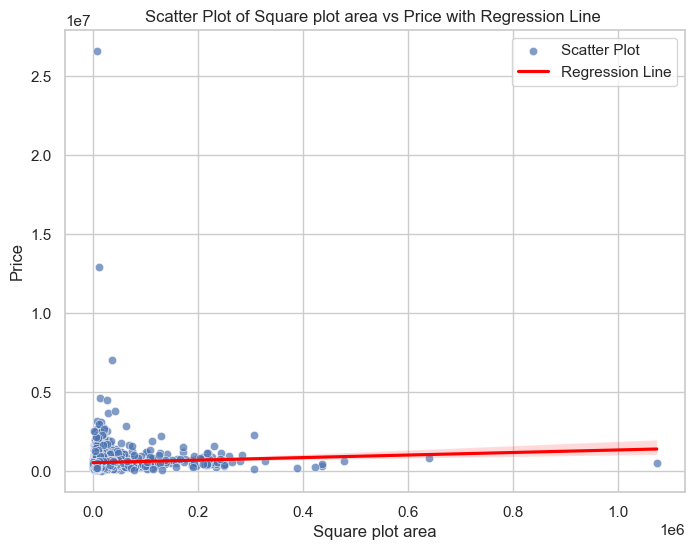

In [78]:

feature = X[:, 1] 
price = Y

# Calculate the predicted values using the coefficients 'a'
y_pred = a[1] * feature

# Set Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature, y=price, label='Scatter Plot', alpha=0.7)
sns.regplot(x=feature, y=price, scatter=False, color='red', label='Regression Line')

plt.xlabel('Square plot area')
plt.ylabel('Price')
plt.title('Scatter Plot of Square plot area vs Price with Regression Line ')

plt.legend()
plt.show()

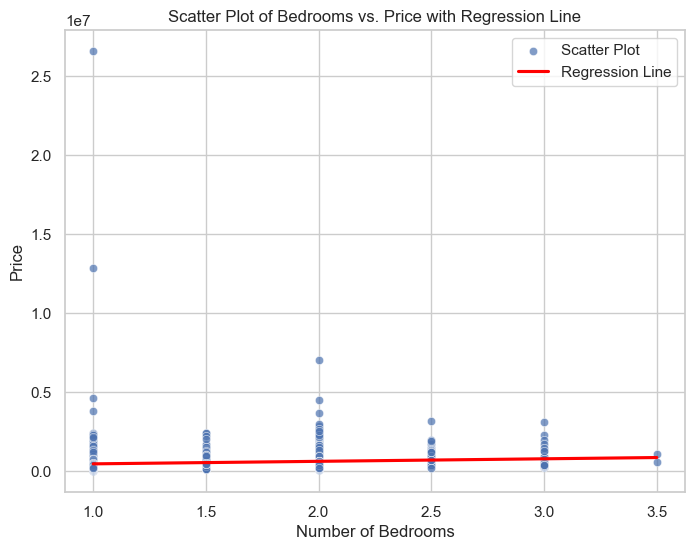

In [77]:
# Select the feature and target
feature = X[:, 2]  # Assuming 'sqft_lot' is the first feature (index 1)
price = Y

# Calculate the predicted values using the coefficients 'a'
y_pred = a[2] * feature

# Set Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature, y=price, label='Scatter Plot', alpha=0.7)
sns.regplot(x=feature, y=price, scatter=False, color='red', label='Regression Line')

plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Bedrooms vs. Price with Regression Line')

plt.legend()
plt.show()